## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [1]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/

In [1]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


In [2]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [1]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

In [2]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [3]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [4]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [5]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [6]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [7]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [8]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [9]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [10]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [11]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

In [12]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

In [34]:
EMBEDDING_SIZE = 300
NEURONS = 256
LAYERS = 2
NUM_CLASSES = 4

In [35]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # RNN layer (LSTM chosen here) for sequential data processing
        # Using LSTM for better performance in learning long-term dependencies
        self.rnn = nn.LSTM(input_size=embed_size,
                           hidden_size=hidden,
                           num_layers=layers,
                           batch_first=True)

        # Fully connected layer to project the RNN output to the number of classes
        self.fc = nn.Linear(in_features=hidden, out_features=num_classes)

    def forward(self, x):
        # Step 1: Embedding Layer
        x = self.embedding_layer(x)  # Convert token indices to embeddings
                                     # Output shape: (batch_size, sequence_length, embed_size)

        # Step 2: RNN layer
        # Pass the embeddings through the LSTM layer
        rnn_out, _ = self.rnn(x)  # rnn_out shape: (batch_size, sequence_length, hidden)

        # Step 3: Select the output of the last time step
        # Taking the last time step for classification purposes
        last_time_step = rnn_out[:, -1, :]  # Shape: (batch_size, hidden)

        # Step 4: Fully connected layer
        out = self.fc(last_time_step)  # Shape: (batch_size, num_classes)

        return out

In [36]:
class RNN_Model_2(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # GRU layer for sequential data processing
        self.rnn = nn.GRU(input_size=embed_size,
                          hidden_size=hidden,
                          num_layers=layers,
                          batch_first=True)

        # Fully connected layer to project the GRU output to the number of classes
        self.fc = nn.Linear(in_features=hidden, out_features=num_classes)

    def forward(self, x):
        # Step 1: Embedding Layer
        x = self.embedding_layer(x)  # Output shape: (batch_size, sequence_length, embed_size)

        # Step 2: GRU layer
        rnn_out, _ = self.rnn(x)  # Output shape: (batch_size, sequence_length, hidden)

        # Step 3: Select the output of the last time step
        last_time_step = rnn_out[:, -1, :]  # Shape: (batch_size, hidden)

        # Step 4: Fully connected layer
        out = self.fc(last_time_step)  # Shape: (batch_size, num_classes)

        return out

In [37]:
class RNN_Model_3(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # Simple RNN layer for sequential data processing
        self.rnn = nn.RNN(input_size=embed_size,
                          hidden_size=hidden,
                          num_layers=layers,
                          batch_first=True)

        # Fully connected layer to project the RNN output to the number of classes
        self.fc = nn.Linear(in_features=hidden, out_features=num_classes)

    def forward(self, x):
        # Step 1: Embedding Layer
        x = self.embedding_layer(x)  # Output shape: (batch_size, sequence_length, embed_size)

        # Step 2: RNN layer
        rnn_out, _ = self.rnn(x)  # Output shape: (batch_size, sequence_length, hidden)

        # Step 3: Select the output of the last time step
        last_time_step = rnn_out[:, -1, :]  # Shape: (batch_size, hidden)

        # Step 4: Fully connected layer
        out = self.fc(last_time_step)  # Shape: (batch_size, num_classes)

        return out

In [38]:
def accuracy(model, loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculations for faster computation
        for data, labels in loader:
            # Forward pass: Get predictions
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)  # Get the index of the highest probability

            # Update total and correct counts
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate accuracy
    accuracy = 100 * correct / total
    return accuracy

In [40]:
from tqdm import tqdm

def train(model, optimiser, epochs=100, patience=2, min_delta=0.01):
    criterion = nn.CrossEntropyLoss()  # Loss function for classification
    best_val_accuracy = 0.0  # Track the best validation accuracy
    patience_counter = 0  # Count epochs without significant improvement

    for epoch in range(epochs):
        # Set model to training mode
        model.train()

        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            # Ensure labels are of correct type
            labels = labels.to(torch.long)

            optimiser.zero_grad()  # Reset gradients for each batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimiser.step()

            running_loss += loss.item()  # Accumulate loss for this epoch

        # Print average loss for this epoch
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

        # Validation phase
        val_acc = accuracy(model, val_loader)
        print(f"Validation Accuracy: {val_acc:.2f}%")

        # Check if validation accuracy improved by more than `min_delta`
        if val_acc > best_val_accuracy + min_delta:
            best_val_accuracy = val_acc  # Update best accuracy
            patience_counter = 0  # Reset patience counter
            print(f"Improved validation accuracy to {val_acc:.2f}%")
        else:
            patience_counter += 1  # Increment patience counter
            print(f"No significant improvement. Patience counter: {patience_counter}/{patience}")

        # Early stopping if patience is exceeded
        if patience_counter >= patience:
            print("Early stopping due to no significant improvement in validation accuracy.")
            break

    print("Training complete.")



In [41]:
# Define the number of epochs and learning rate
epochs = 20  # You can adjust this value based on the model's performance
lr = 0.001   # Typical initial learning rate for Adam optimizer

# Instantiate the models
lstm_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
gru_model = RNN_Model_2(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
simple_rnn_model = RNN_Model_3(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)

# Define optimizer (use the same for all models)
optimizer_lstm = torch.optim.Adam(lstm_model.parameters(), lr)
optimizer_gru = torch.optim.Adam(gru_model.parameters(), lr)
optimizer_rnn = torch.optim.Adam(simple_rnn_model.parameters(), lr)


In [43]:
# Train and evaluate each model
print("Training and evaluating each model...\n")

# Train and evaluate LSTM model
print("Training LSTM Model...")
train(lstm_model, optimizer_lstm, epochs=1)
lstm_accuracy = accuracy(lstm_model, test_loader)
print(f"LSTM Model Test Accuracy: {lstm_accuracy:.4f}\n")

# Train and evaluate GRU model
print("Training GRU Model...")
train(gru_model, optimizer_gru, epochs=1)
gru_accuracy = accuracy(gru_model, test_loader)
print(f"GRU Model Test Accuracy: {gru_accuracy:.4f}\n")

# Train and evaluate Simple RNN model
print("Training Simple RNN Model...")
train(simple_rnn_model, optimizer_rnn, epochs=1)
simple_rnn_accuracy = accuracy(simple_rnn_model, test_loader)
print(f"Simple RNN Model Test Accuracy: {simple_rnn_accuracy:.4f}\n")

Training and evaluating each model...

Training LSTM Model...


Epoch 1/1: 100%|██████████| 422/422 [11:01<00:00,  1.57s/it]


Epoch [1/1], Loss: 0.2197
Validation Accuracy: 90.58%
Improved validation accuracy to 90.58%
Training complete.
LSTM Model Test Accuracy: 90.6184

Training GRU Model...


Epoch 1/1: 100%|██████████| 422/422 [09:38<00:00,  1.37s/it]


Epoch [1/1], Loss: 0.5574
Validation Accuracy: 88.53%
Improved validation accuracy to 88.53%
Training complete.
GRU Model Test Accuracy: 89.0000

Training Simple RNN Model...


Epoch 1/1: 100%|██████████| 422/422 [05:09<00:00,  1.36it/s]


Epoch [1/1], Loss: 1.3729
Validation Accuracy: 32.93%
Improved validation accuracy to 32.93%
Training complete.
Simple RNN Model Test Accuracy: 32.6842



In [44]:
# Summary of results
print("Model Performance Summary:")
print(f"LSTM Model Test Accuracy: {lstm_accuracy:.4f}")
print(f"GRU Model Test Accuracy: {gru_accuracy:.4f}")
print(f"Simple RNN Model Test Accuracy: {simple_rnn_accuracy:.4f}")

Model Performance Summary:
LSTM Model Test Accuracy: 90.6184
GRU Model Test Accuracy: 89.0000
Simple RNN Model Test Accuracy: 32.6842


In [52]:
import random

def sample_text(models, model_names, loader, vocab, num_samples=5):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    # Set models to evaluation mode
    for model in models:
        model.eval()

    examples = []

    # Collect predictions and true labels
    with torch.no_grad():
        for inputs, labels in loader:
            # Get the batch size for random sampling
            batch_size = inputs.shape[0]

            # Get predictions for each model
            model_predictions = []
            for model in models:
                outputs = model(inputs)
                predicted_classes = torch.argmax(outputs, dim=1)
                model_predictions.append(predicted_classes.cpu().numpy())

            # Convert true labels to a list
            labels = labels.cpu().numpy()

            # Randomly sample indices from the batch
            sample_indices = random.sample(range(batch_size), min(num_samples, batch_size))

            # Gather the original texts, predicted classes, and true labels
            for idx in sample_indices:
                original_text = " ".join([vocab.lookup_token(i) for i in inputs[idx].cpu().numpy() if i != vocab["<pad>"]])
                true_label = labels[idx]
                predictions = [model_pred[idx] for model_pred in model_predictions]

                examples.append((original_text, predictions, true_label))

            # Stop once we have collected enough examples
            if len(examples) >= num_samples:
                break

    # Display the examples
    print("Sample Predictions from All Models:")
    for i, (text, preds, true) in enumerate(examples):
        print(f"\nExample {i+1}:")
        print(f"Original Text: {text}")
        print(f"True Label: {true}")
        for model_name, pred in zip(model_names, preds):
            result = "✅ Correct" if pred == true else "❌ Incorrect"
            print(f"{model_name} Prediction: {pred} - {result}")
        print("-" * 50)

In [53]:
# Usage
models = [lstm_model, gru_model, simple_rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
sample_text(models, model_names, test_loader, vocab)

Sample Predictions from All Models:

Example 1:
Original Text: north korea to review its role in nuclear talks seoul north korea is seriously reconsidering its role in talks on its nuclear programs because of what it sees as a concerted campaign to topple the government in pyongyang , the north korean foreign ministry said monday .
True Label: 0
LSTM Model Prediction: 0 - ✅ Correct
GRU Model Prediction: 0 - ✅ Correct
Simple RNN Model Prediction: 2 - ❌ Incorrect
--------------------------------------------------

Example 2:
Original Text: nasa again postpones launch of autonomous dart spacecraft com staff . nasa once again postponed the launch of the demonstration of autonomous rendezvous technology ( dart ) spacecraft thursday due to the discovery of contamination inside the of its pegasus launch vehicle .
True Label: 3
LSTM Model Prediction: 3 - ✅ Correct
GRU Model Prediction: 3 - ✅ Correct
Simple RNN Model Prediction: 2 - ❌ Incorrect
--------------------------------------------------

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrices(models, model_names, loader):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    for model, name in zip(models, model_names):
        model.eval()  # Set model to evaluation mode
        all_preds = []
        all_labels = []

        # Collect predictions and true labels
        with torch.no_grad():
            for inputs, labels in loader:
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute confusion matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        # Calculate common mistakes
        most_common_mistakes = {}
        for true_label in range(cm.shape[0]):
            # Exclude the diagonal (correct predictions)
            predicted_errors = cm[true_label, :] - np.eye(cm.shape[0])[true_label] * cm[true_label, true_label]
            common_error_idx = np.argmax(predicted_errors)
            most_common_mistakes[true_label] = common_error_idx

        # Print a description of the most common mistakes
        print(f"Most common mistakes for {name}:")
        for true_class, mistaken_class in most_common_mistakes.items():
            print(f" - True class {true_class} is often mistaken as class {mistaken_class}")
        print("-" * 50)

<Figure size 800x600 with 0 Axes>

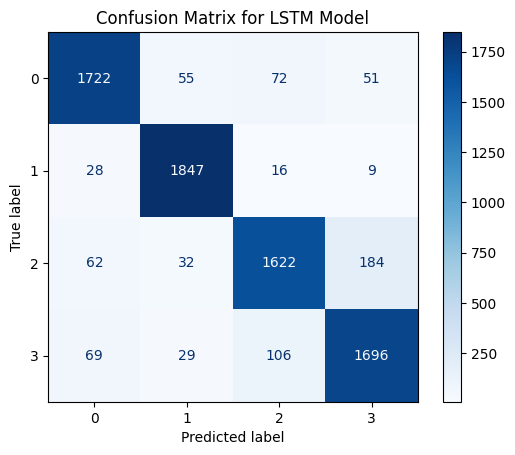

Most common mistakes for LSTM Model:
 - True class 0 is often mistaken as class 2
 - True class 1 is often mistaken as class 0
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 800x600 with 0 Axes>

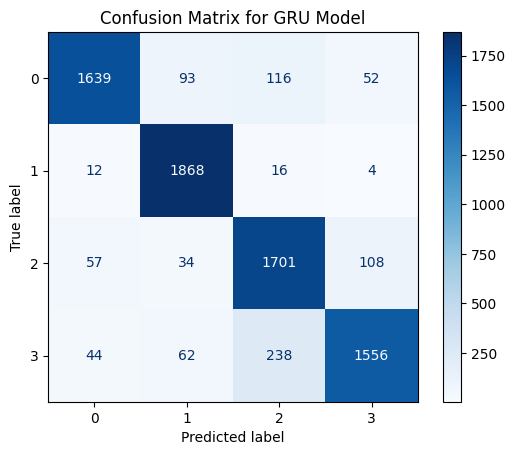

Most common mistakes for GRU Model:
 - True class 0 is often mistaken as class 2
 - True class 1 is often mistaken as class 2
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 800x600 with 0 Axes>

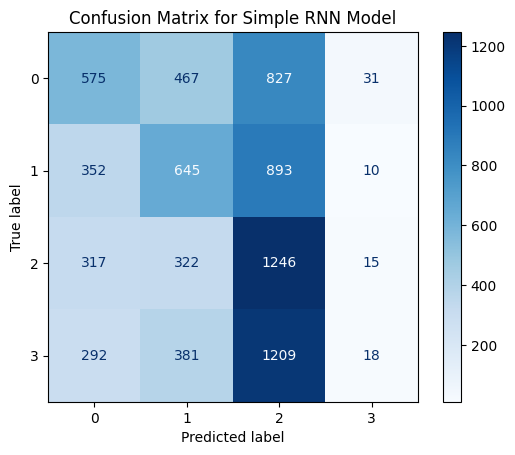

Most common mistakes for Simple RNN Model:
 - True class 0 is often mistaken as class 2
 - True class 1 is often mistaken as class 2
 - True class 2 is often mistaken as class 1
 - True class 3 is often mistaken as class 2
--------------------------------------------------


In [55]:
# Usage
models = [lstm_model, gru_model, simple_rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
display_confusion_matrices(models, model_names, test_loader)